In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
from nltk import PorterStemmer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./dataset/amazon_reviews.csv')

In [3]:
columns = ['summary', 'reviewText', 'overall' ]

In [4]:
df = df[columns]

In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
def create_tokenize(text):
    if isinstance(text, str):
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return filtered_tokens
    else:
        return []

In [7]:
df['tokenize'] = df['reviewText'].apply(create_tokenize)

In [8]:
all_tokens = [token for tokens in df['tokenize'] for token in tokens]
word_freq = Counter(all_tokens)
word_freq

Counter({'card': 4397,
         'phone': 1636,
         'memory': 1254,
         'great': 1190,
         'works': 1160,
         'use': 1075,
         'one': 998,
         'SD': 943,
         'cards': 915,
         'Galaxy': 874,
         'fast': 821,
         'SanDisk': 813,
         'price': 801,
         'Samsung': 759,
         'good': 755,
         'storage': 737,
         'bought': 654,
         'would': 640,
         'well': 620,
         'speed': 599,
         'music': 587,
         'tablet': 574,
         'get': 534,
         'using': 527,
         'product': 508,
         'like': 500,
         '10': 483,
         'camera': 483,
         'work': 473,
         'got': 465,
         'problems': 462,
         'adapter': 456,
         '2': 455,
         'space': 454,
         'issues': 448,
         'Ive': 416,
         'buy': 415,
         'time': 413,
         'worked': 410,
         '3': 410,
         'new': 410,
         'GB': 409,
         'video': 408,
         'used': 405,
 

In [9]:
word, how = zip(*word_freq.most_common(20))

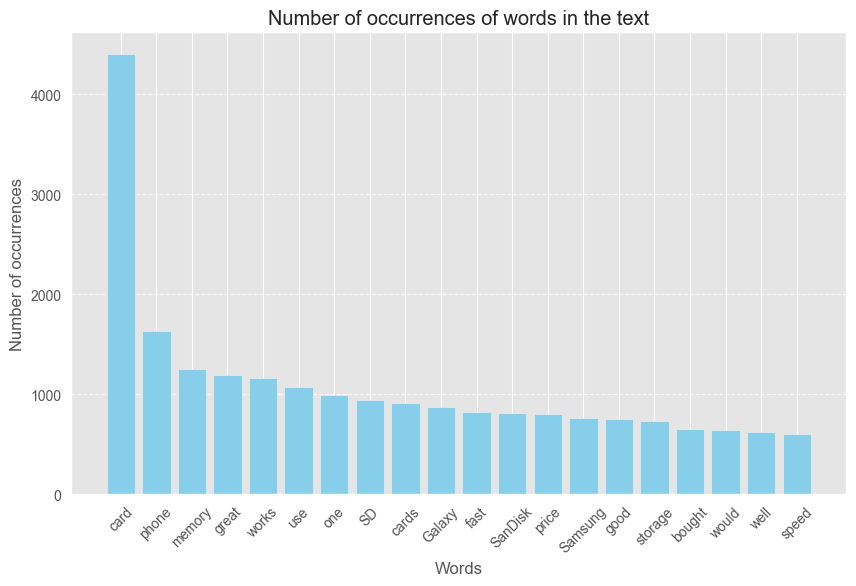

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(word, how, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Number of occurrences')
plt.title('Number of occurrences of words in the text')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
def create_stemer(words: list[str]):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in words]

In [12]:
df['stemmer'] = df['tokenize'].apply(create_stemer)

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader(text):
    if isinstance(text, str):
        sia = SentimentIntensityAnalyzer()
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score['compound']
    else:
        return -1


In [14]:
df['analyze_sentiment_vader'] = df['reviewText'].apply(analyze_sentiment_vader)

In [15]:
df['analyze_sentiment_vader'].describe()

count    4915.000000
mean        0.413125
std         0.496893
min        -1.000000
25%         0.052550
50%         0.599400
75%         0.812200
max         0.999400
Name: analyze_sentiment_vader, dtype: float64

In [16]:
def create_label(value):
    if value == -1:
        return "Missing data or value problem"
    if value >= -0.3:
        return "Negative"
    elif value > -0.5:
        return "Neutral"
    else:
        return "Positive"


In [18]:
df['analyze_sentiment_vader_label'] = df['analyze_sentiment_vader'].apply(create_label)

In [19]:
df = df[df['analyze_sentiment_vader_label'] != "Missing data or value problem"]

In [20]:
df['analyze_sentiment_vader_label'].value_counts()

analyze_sentiment_vader_label
Negative    4326
Positive     411
Neutral      177
Name: count, dtype: int64

In [21]:
df.columns

Index(['summary', 'reviewText', 'overall', 'tokenize', 'stemmer',
       'analyze_sentiment_vader', 'analyze_sentiment_vader_label'],
      dtype='object')

In [22]:
def len_text(text):
    return len(text)

In [23]:
df['len_text'] = df['reviewText'].apply(len_text)

In [24]:
df

,summary,reviewText,overall,tokenize,stemmer,analyze_sentiment_vader,analyze_sentiment_vader_label,len_text
0,Four Stars,No issues.,4.0,[issues],[issu],-0.2960,Negative,10
1,MOAR SPACE!!!,"Purchased this for my device, it worked as adv...",5.0,"[Purchased, device, worked, advertised, never,...","[purchas, devic, work, advertis, never, much, ...",-0.2960,Negative,158
2,nothing to really say....,it works as expected. I should have sprung for...,4.0,"[works, expected, sprung, higher, capacity, th...","[work, expect, sprung, higher, capac, think, m...",-0.3089,Neutral,166
3,Great buy at this price!!! *** UPDATE,This think has worked out great.Had a diff. br...,5.0,"[think, worked, greatHad, diff, bran, 64gb, ca...","[think, work, greathad, diff, bran, 64gb, card...",0.7081,Negative,340
4,best deal around,"Bought it with Retail Packaging, arrived legit...",5.0,"[Bought, Retail, Packaging, arrived, legit, or...","[bought, retail, packag, arriv, legit, orang, ...",0.7087,Negative,290
...,...,...,...,...,...,...,...,...
4910,Do not waste your money.,I bought this Sandisk 16GB Class 10 to use wit...,1.0,"[bought, Sandisk, 16GB, Class, 10, use, HTC, I...","[bought, sandisk, 16gb, class, 10, use, htc, i...",0.0018,Negative,320
4911,Great item!,Used this for extending the capabilities of my...,5.0,"[Used, extending, capabilities, Samsung, Galax...","[use, extend, capabl, samsung, galaxi, note, 1...",0.1761,Negative,148
4912,Fast and reliable memory card,Great card that is very fast and reliable. It ...,5.0,"[Great, card, fast, reliable, comes, optional,...","[great, card, fast, reliabl, come, option, ada...",0.8588,Negative,233
4913,Great little card,Good amount of space for the stuff I want to d...,5.0,"[Good, amount, space, stuff, want, fits, GoPro...","[good, amount, space, stuff, want, fit, gopro,...",0.4939,Negative,91


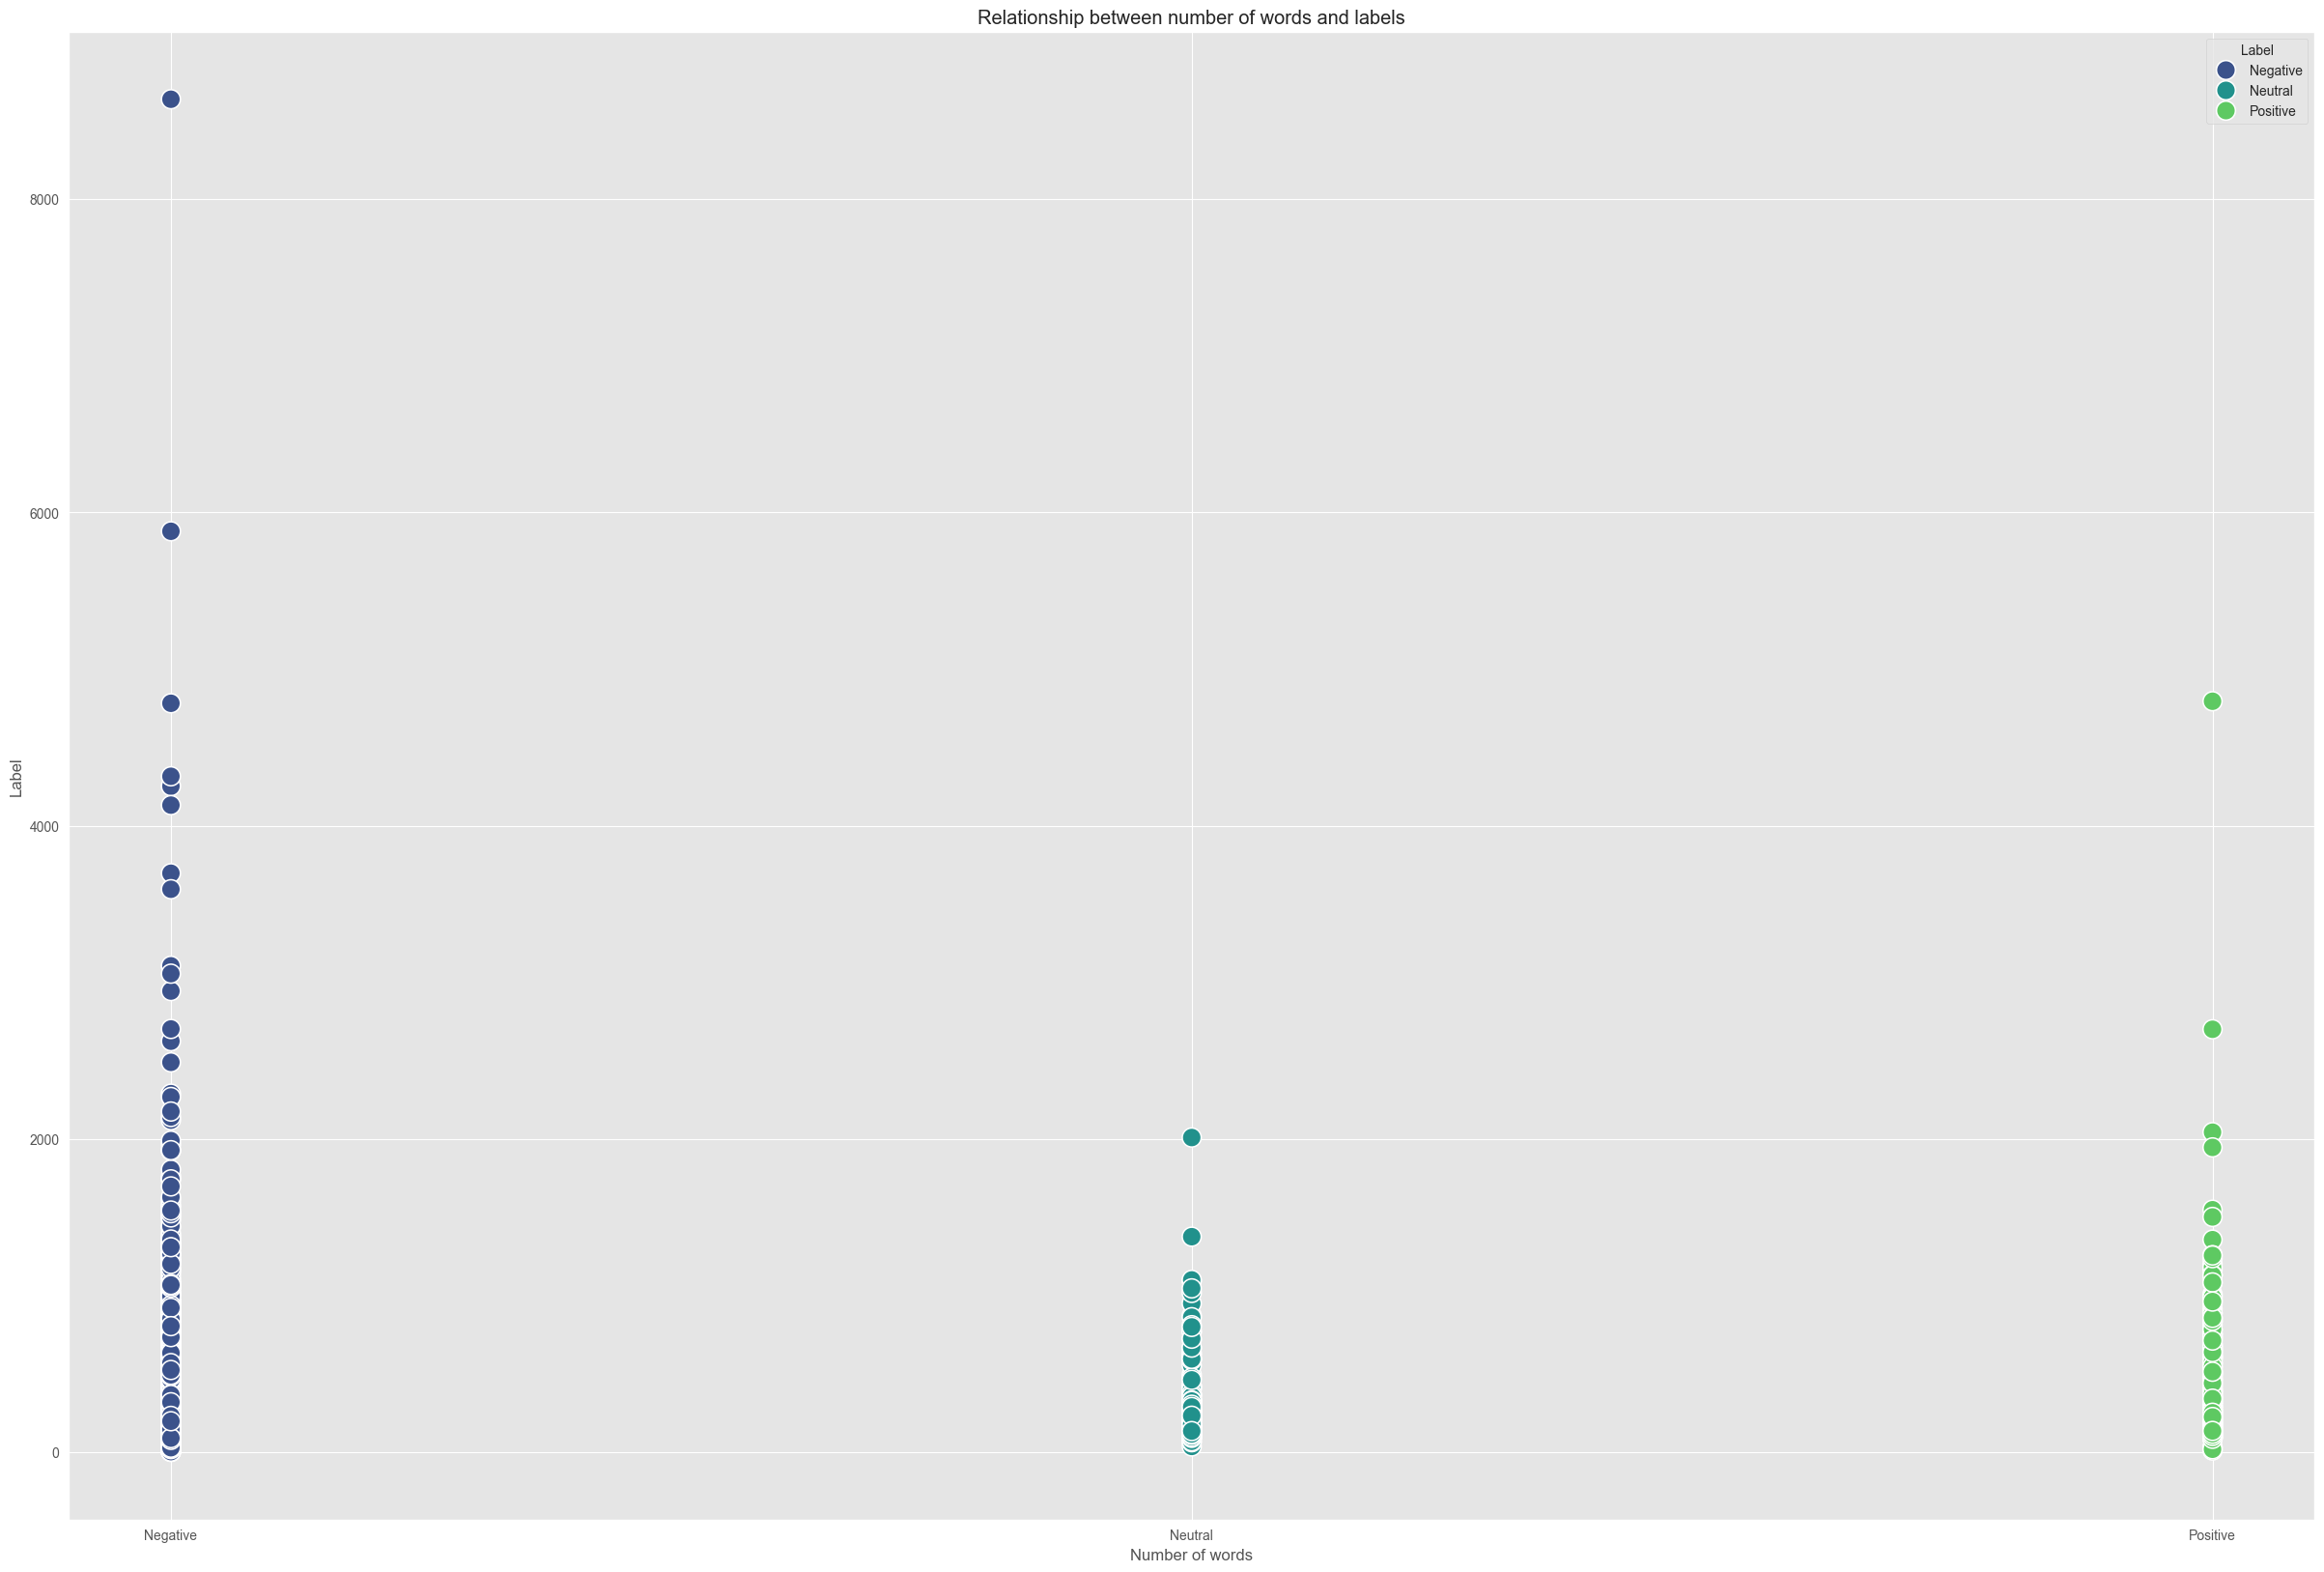

In [25]:
plt.figure(figsize=(30, 20))
sns.scatterplot(data=df, x='analyze_sentiment_vader_label', y= 'len_text', hue='analyze_sentiment_vader_label', palette='viridis', s=200)
plt.title('Relationship between number of words and labels')
plt.xlabel('Number of words')
plt.ylabel('Label')
plt.legend(title='Label')
plt.show()

Widać, że jeśli są negatywne opinie to częściej ludzie piszę więcej niż są to opinie netrualne lub pozytywne

In [26]:
def create_label_number(value):
    if value == -1:
        return None
    if value >= -0.3:
        return -1
    elif value > -0.5:
        return 0
    else:
        return 1


In [27]:
df['label'] = df['analyze_sentiment_vader'].apply(create_label_number)

In [28]:
df['label']

0      -1
1      -1
2       0
3      -1
4      -1
       ..
4910   -1
4911   -1
4912   -1
4913   -1
4914   -1
Name: label, Length: 4914, dtype: int64

In [29]:
X = df['reviewText']
Y = df['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)